In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

In [7]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

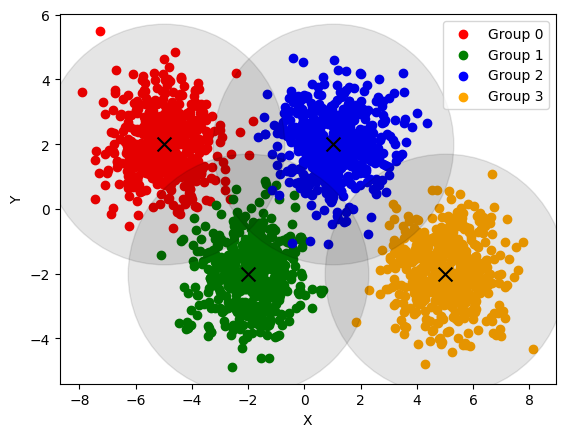

In [8]:
colors = ['red', 'green', 'blue', 'orange']

for i in range(len(colors)):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], 
                c=colors[i], label=f'Group {i}')

x_centers = [c[0] for c in centers]
y_centers = [c[1] for c in centers]
plt.scatter(x_centers, y_centers, s=30000, c='black', alpha=.1)
plt.scatter(x_centers, y_centers, s=100, c='black', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [9]:
model = Sequential([
    Dense(units=16, activation="relu"),
    Dense(units=12, activation="relu"),
    Dense(units=4, activation="linear"),
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.5160 - loss: 1.1925 
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.6510 - loss: 1.0626
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.6975 - loss: 0.9558
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7150 - loss: 0.8666
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.7245 - loss: 0.7920
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7345 - loss: 0.7283
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7425 - loss: 0.6725
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7665 - loss: 0.6212
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8245 - loss: 0.5756
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8700 - loss: 0.5348
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9065 - loss: 0.4979
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/ste

In [10]:
X_test = np.random.rand(2000, 2) * 20 - 10  # (max - min = 12, luego restamos 6)
logits = model.predict(X_test)

y_pred = np.argmax(tf.nn.softmax(logits).numpy(), axis=1)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


array([2, 2, 3, ..., 2, 1, 0], shape=(2000,))

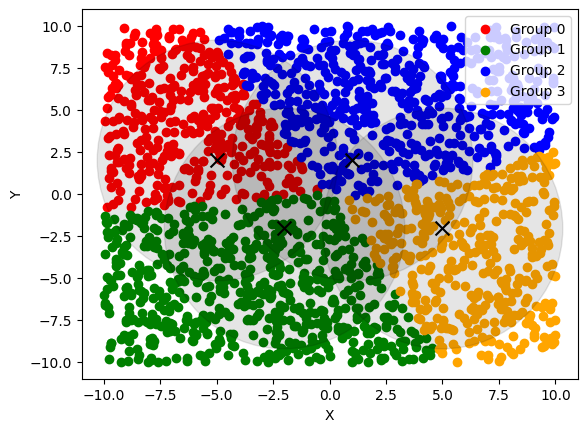

In [11]:
for i in range(len(colors)):
    plt.scatter(X_test[y_pred==i, 0], X_test[y_pred==i, 1], 
                c=colors[i], label=f'Group {i}')

x_centers = [c[0] for c in centers]
y_centers = [c[1] for c in centers]
plt.scatter(x_centers, y_centers, s=30000, c='black', alpha=.1)
plt.scatter(x_centers, y_centers, s=100, c='black', marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()